# **Phase 4 Project:**
# **Apple and Google Twitter Sentiment Analysis**

# **1. Business Understanding**
---
## 1.1 Business Overview

Companies such as Apple and Google continuously produce and release new products ranging from smartphones and software updates to smart home devices. With social media platforms like Twitter (currently known as X) becoming key spaces for public expression, users frequently share their opinions, complaints, and praise about these products online.

Understanding these public sentiments provides valuable insight into customer satisfaction, brand perception, and potential areas for improvement. Sentiment analysis using Natural Language Processing offers an efficient, data-driven way to interpret large volumes of social media data and extract actionable insights. This can support marketing, customer experience, and product development strategies.

## 1.2 Stakeholder 
- Apple’s and Google’s Product Development and Marketing Teams
- Business Analysts and Data Scientists within both companies
- Decision-makers responsible for customer engagement and brand reputation 

## 1.3 Problem Statement 
Given the large volume of audience based data on Twitter, manually analyzing sentiments toward Apple and Google products is time-consuming and inefficient. There is a need for an automated Natural Language Processing model that can accurately classify these tweets into categories such as positive, negative, or neutral, enabling teams to quickly view, analyse, and respond to the publics opinion appropriately.

## 1.4 Objectives 
### 1.4.1 Main Objective 
To develop an effective sentiment analysis model that is able to automatically classify tweets discussing Apple and Google products as positive, negative or neutral

### 1.4.2 Specific Objectives 
- Idenitfy patterns in user sentiments.
- Compare the performances of both binary and multiclass algortihms.
- Provide sufficient recommendations to the companies on how to go about the sentiments.

## 1.5 Research Questions 

1. What is the overall sentiment of Twitter users toward Apple and Google products?
2. Which machine learning approach performs best for classifying tweet sentiment?
3. Can sentiment analysis help identify product or brand perception trends over time?
   
## 1.6 Success Criteria 
Actionable insights that could inform product or marketing strategies for Apple and Google.

# **2. Data Understanding** 
---

## 2.1 Importing Relevant Libraries

We are goint start with getting the relevant libraries that are going to help us understand and inspect our data. We are also importing libraries that will help us with manipulating, visualizing and modelling our data.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
import contractions
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

## 2.2 Loading the Data

Here we will read our dataset from a twitter company and transform it into a data frame for easier reading.

In [2]:
nlp_data = pd.read_csv(r'judge-1377884607_tweet_product_company.csv', encoding='latin-1')

nlp_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## 2.3 Initial Exploration And EDA

Lets explore our data and see what attributes it has.

In [3]:
# 2.3.1 Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

The above sets our design for visualizations

In [4]:
nlp_data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


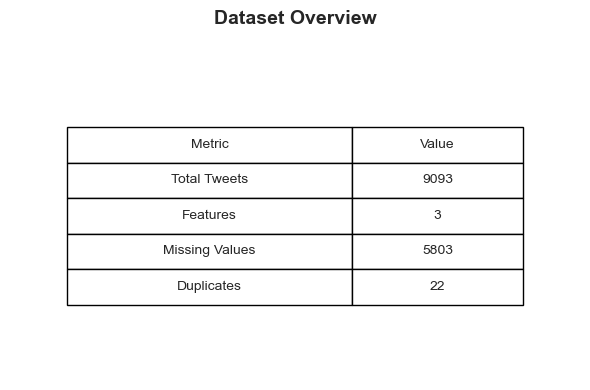

In [5]:
# 2.3.2 Dataset summary
dataset_info = pd.DataFrame({
    'Metric': ['Total Tweets', 'Features', 'Missing Values', 'Duplicates'],
    'Value': [
        nlp_data.shape[0],
        nlp_data.shape[1],
        nlp_data.isnull().sum().sum(),
        nlp_data.duplicated().sum()
    ]
})

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')

# Create and display the table
table = ax.table(cellText=dataset_info.values,
                 colLabels=dataset_info.columns,
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.5, 0.3])
table.set_fontsize(10)
table.scale(1, 2)
ax.set_title('Dataset Overview', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

Our data has 9093 tweets, 3 features/collumns i.e tweet_text, emotion_in_tweet_is_directed_at and is_there_an_emotion_directed_at_a_brand_or_product. It also has 5803 missing values in the rows and 22 duplicates.



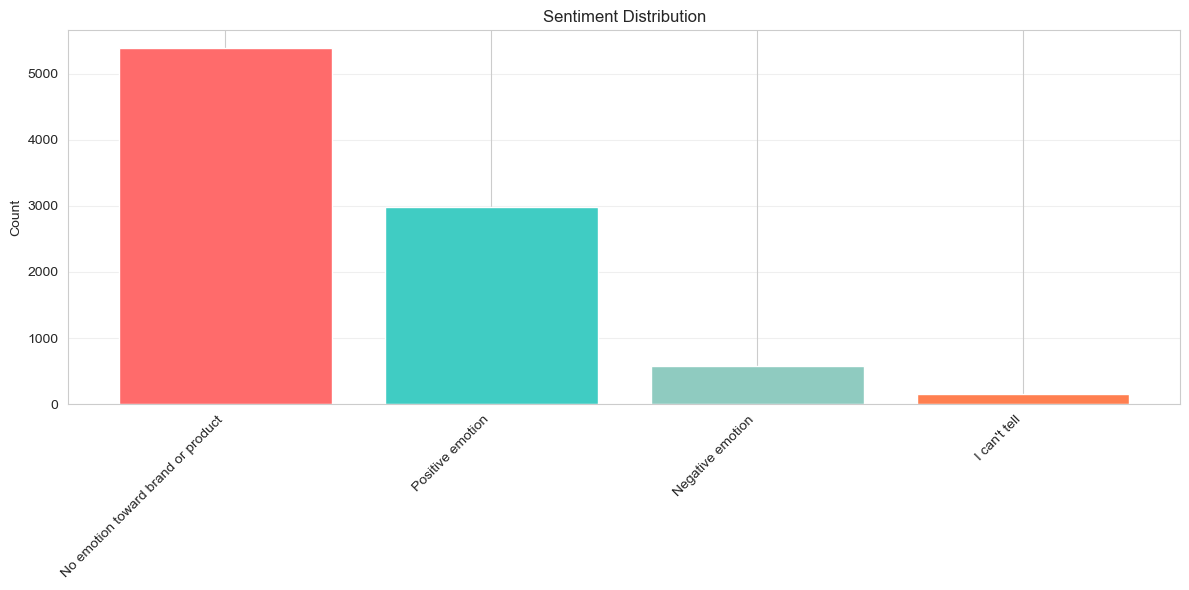

In [6]:
# 2.3.3 Viewing sentiment values
counts = nlp_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
colors = ['#ff6b6b', "#40ccc3", "#8fcbc0", 'coral']

# The Plot
fig, ax = plt.subplots()
ax.bar(range(len(counts)), counts.values, color=colors)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set(title='Sentiment Distribution', ylabel='Count')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

People who had no emtion towards a brand or product accounted for over half the tweets. Positive emotion followed with almost 300 tweets followed by negative emotion twwets and lastly is 'I can't tell' tweets'

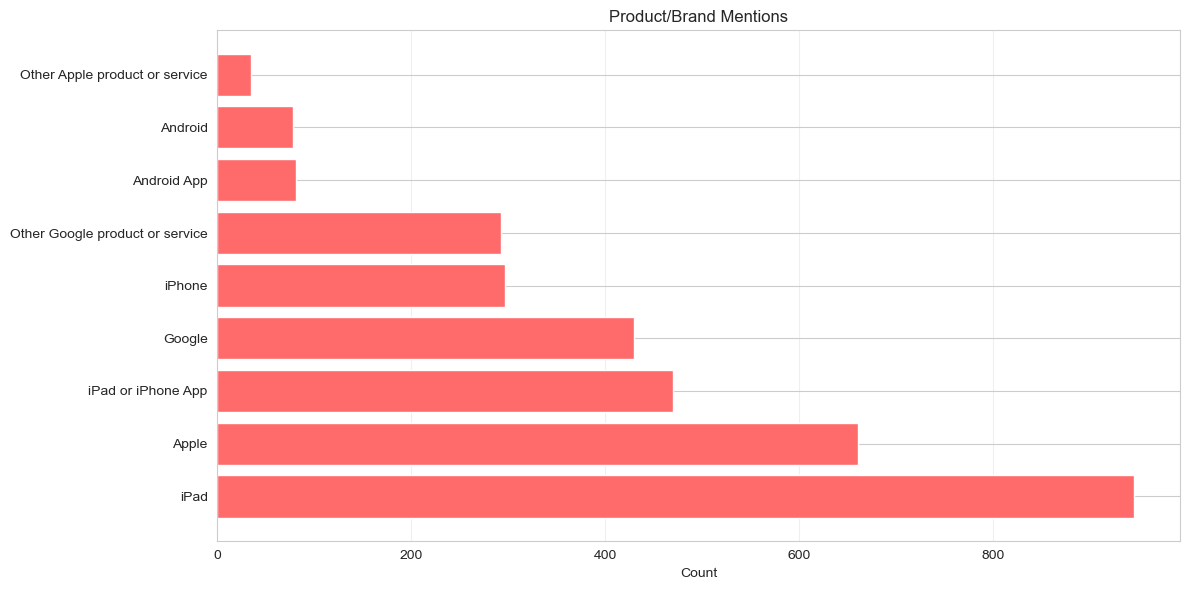

In [7]:
# 2.3.4 Counting brand/product mentions
counts = nlp_data['emotion_in_tweet_is_directed_at'].value_counts()

# The Plot
fig, ax = plt.subplots()
ax.barh(range(len(counts)), counts.values, color='#ff6b6b')
ax.set_yticks(range(len(counts)))
ax.set_yticklabels(counts.index)
ax.set(title='Product/Brand Mentions', xlabel='Count')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

As seen above, ipad had the most tweets which could mean there were a lot of sentiments towards the product. Apple, ipad/iphone app and google followed with other Apple product or service and google where the least tweeted products/brand.

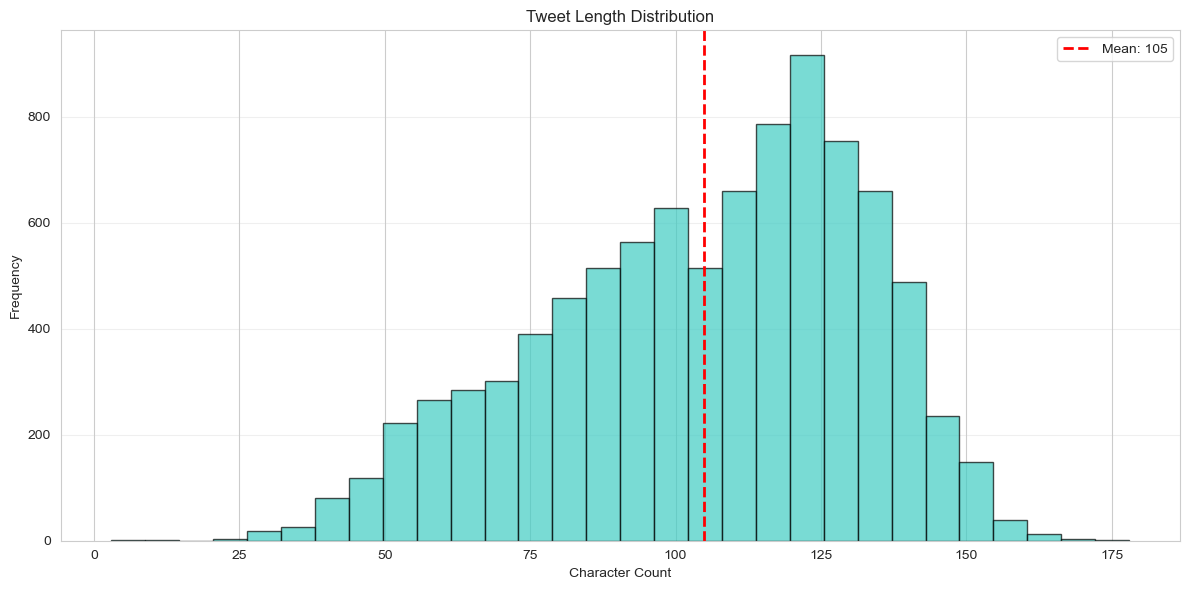

In [8]:
# 2.3.5 Calculating the tweet lengths
nlp_data['tweet_length'] = nlp_data['tweet_text'].astype(str).str.len()
mean_len = nlp_data['tweet_length'].mean()

#  The Plot
fig, ax = plt.subplots()
ax.hist(nlp_data['tweet_length'], bins=30, color="#40ccc3", edgecolor='black', alpha=0.7)
ax.axvline(mean_len, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_len:.0f}')
ax.set(title='Tweet Length Distribution', xlabel='Character Count', ylabel='Frequency')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

The mean length  for the tweets is 105 characters long. We have also added a column for tweet length in our data frame.

# **3. Data Preparation**
---

In this section we will prepare our data by cleaning it and manipulating collumns for modelling purposes.

## 3.1 Data Cleaning

We will begin by removing rows with missing values from 'is_there_an_emotion_directed_at_a_brand_or_product' column.

In [9]:
# 3.1.1 Remove rows with missing sentiment labels
nlp_data.dropna(subset=['is_there_an_emotion_directed_at_a_brand_or_product'])

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140


In [10]:
# 3.1.2 Remove rows with missing tweet text
nlp_data.dropna(subset=['tweet_text'])

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140


Here we will drop all duplicated rows in the 'tweet_text' column but keep the first duplicate.

In [11]:
# 3.1.3 Remove duplicates
nlp_data.drop_duplicates(subset=['tweet_text'], keep='first')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140


In this part, we will  manipulate our 'tweet_text collumn'  so that we can remain with data that is significant to our model and add a cleaned_tweet column.

In [12]:
# 3.1.4 Cleaning the tweet text

# Define a simple cleaning function
def clean_tweet(text):
    # Convert to lowercase
    text = str(text).lower()
    # Handle contractions eg, can't and cannot 
    text = contractions.fix(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtag symbol
    text = re.sub(r'#', '', text) 
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # removes punctuation/symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  
    # Remove extra spaces
    return ' '.join(text.split())

# Apply the function to tweet column              
nlp_data['cleaned_tweet'] = nlp_data['tweet_text'].apply(clean_tweet)

# Remove empty tweets after cleaning
nlp_data[nlp_data['cleaned_tweet'].str.strip() != '']

nlp_data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,i have a 3g iphone after 3 hrs tweeting at ris...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,know about awesome ipadiphone app that you wil...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,can not wait for ipad 2 also they should sale ...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,i hope this years festival is not as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,great stuff on fri sxsw marissa mayer google t...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,140,new ipad apps for speechtherapy and communicat...
6,NaN,NaN,No emotion toward brand or product,3,nan
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,138,sxsw is just starting ctia is around the corne...
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,129,beautifully smart and simple idea rt wrote abo...
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,88,counting down the days to sxsw plus strong can...


In [13]:
# 3.1.5 Rename columns for easier handling
nlp_data.rename(columns={
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment',
    'emotion_in_tweet_is_directed_at': 'product'
}, inplace=True)

In [14]:
# 3.1.6 Confriming the new column names 
nlp_data.columns

Index(['tweet_text', 'product', 'sentiment', 'tweet_length', 'cleaned_tweet'], dtype='object')

## 3.2 Data Inspection

In this step, we view the dataset in visuals after cleaning to see how it looks

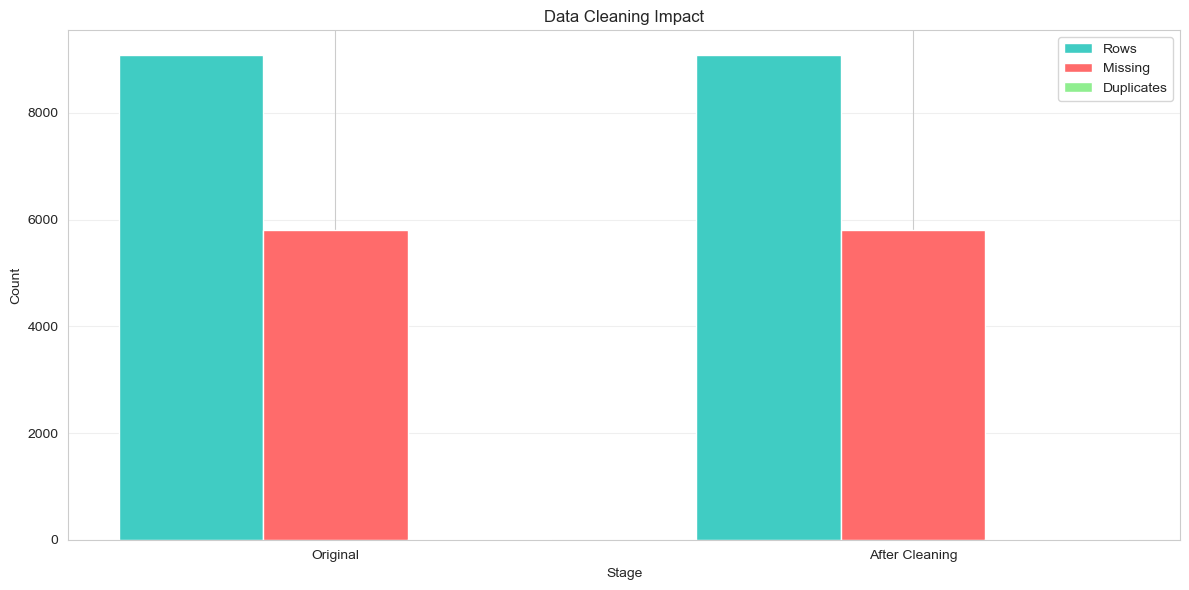

In [15]:
x = np.arange(2)
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, [len(nlp_data), len(nlp_data)], width, label='Rows', color="#40ccc3")
ax.bar(x, [nlp_data.isnull().sum().sum(), nlp_data.isnull().sum().sum()], width, label='Missing', color='#ff6b6b')
ax.bar(x + width, [nlp_data.duplicated().sum(), nlp_data.duplicated().sum()], width, label='Duplicates', color='lightgreen')

ax.set(title='Data Cleaning Impact', xlabel='Stage', ylabel='Count')
ax.set_xticks(x)
ax.set_xticklabels(['Original', 'After Cleaning'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

There is not a lot of difference between the original and the cleaned data but the cleaned data should have fewer rows.

## 3.3 Advanced Insights

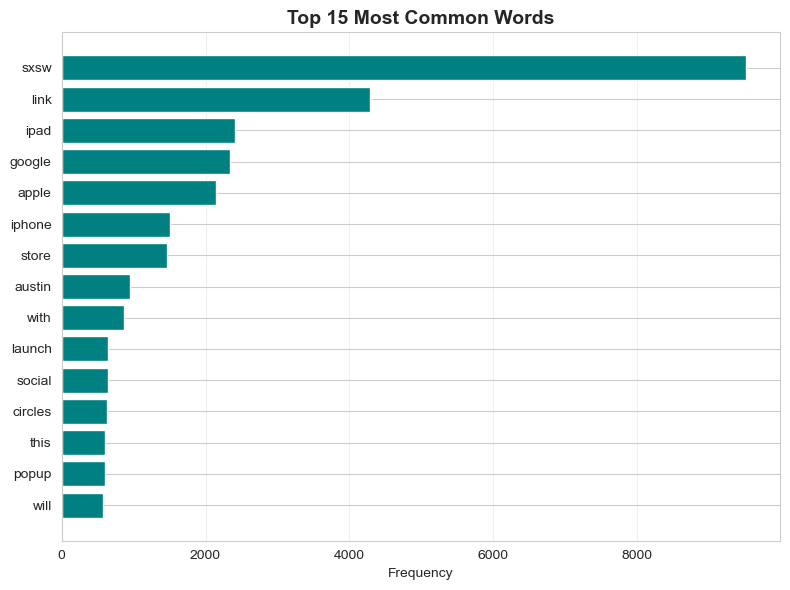

In [16]:
# Top 15 most common words
all_words = ' '.join(nlp_data['cleaned_tweet']).split()
common_words = [word for word in all_words if len(word) > 3]
word_freq = Counter(common_words).most_common(15)
words, counts = zip(*word_freq)

# The Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(words)), counts, color='teal')
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.invert_yaxis()
ax.set_title('Top 15 Most Common Words', fontsize=14, fontweight='bold')
ax.set_xlabel('Frequency')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

As seen above,the most common words is sxsw, lnik and ipad while the least common words will, popup and this.

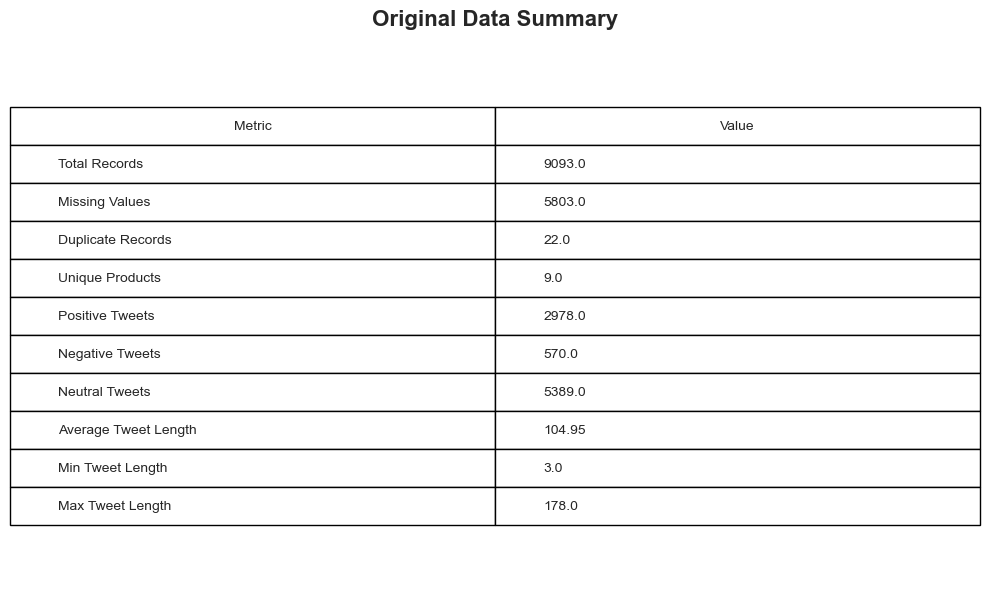

In [17]:
# Basic summary from original data
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Missing Values',
        'Duplicate Records',
        'Unique Products',
        'Positive Tweets',
        'Negative Tweets',
        'Neutral Tweets',
        'Average Tweet Length',
        'Min Tweet Length',
        'Max Tweet Length'
    ],
    'Value': [
        len(nlp_data),
        nlp_data.isnull().sum().sum(),
        nlp_data.duplicated().sum(),
        nlp_data['product'].nunique() if 'product' in nlp_data.columns else 'N/A',
        len(nlp_data[nlp_data['sentiment'] == 'Positive emotion']) if 'sentiment' in nlp_data.columns else 'N/A',
        len(nlp_data[nlp_data['sentiment'] == 'Negative emotion']) if 'sentiment' in nlp_data.columns else 'N/A',
        len(nlp_data[nlp_data['sentiment'] == 'No emotion toward brand or product']) if 'sentiment' in nlp_data.columns else 'N/A',
        round(nlp_data['tweet_length'].mean(), 2) if 'tweet_length' in nlp_data.columns else 'N/A',
        nlp_data['tweet_length'].min() if 'tweet_length' in nlp_data.columns else 'N/A',
        nlp_data['tweet_length'].max() if 'tweet_length' in nlp_data.columns else 'N/A'
    ]
})

# Display as table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=summary_stats.values,
                 colLabels=summary_stats.columns,
                 cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.title('Original Data Summary', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


The above data frame shows a more indepth look ata how original dataset looks like.

In [18]:
# 3.32 Save cleaned dataset
nlp_data.to_csv('nlp_cleaned_data.csv', index=False)

We then save our cleaned data into a csv file.

# **4. Data Preprocessing**
---

This section continues from the data cleaning stage and includes tokenization, stop word removal, lemmatization/stemming, rejoining, and vectorization

## 4.1 Cleaning Before Preproccessing 

In [19]:
# 4.1.1 Importing the clean dataset
nlp_df = pd.read_csv('nlp_cleaned_data.csv')
nlp_df.head(2)

,tweet_text,product,sentiment,tweet_length,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,i have a 3g iphone after 3 hrs tweeting at ris...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,know about awesome ipadiphone app that you wil...


In [20]:
# 4.1.2 Dropping columns not required for the analysis
nlp_df = nlp_df.drop(['tweet_text', 'tweet_length'], axis=1)
nlp_df.head(2)

,product,sentiment,cleaned_tweet
0,iPhone,Negative emotion,i have a 3g iphone after 3 hrs tweeting at ris...
1,iPad or iPhone App,Positive emotion,know about awesome ipadiphone app that you wil...


In [21]:
# 4.1.3 Checking for null values  
nlp_df.isnull().sum()

product          5802
sentiment           0
cleaned_tweet       1
dtype: int64

In [22]:
# 4.1.4 Dropping the product column as it consists of many null values
nlp_df = nlp_df.drop(['product'], axis=1)
nlp_df.head(2)

,sentiment,cleaned_tweet
0,Negative emotion,i have a 3g iphone after 3 hrs tweeting at ris...
1,Positive emotion,know about awesome ipadiphone app that you wil...


In [23]:
# 4.1.5 Dropping the 1 row in the cleaned_tweets column thats missing 
nlp_df = nlp_df.dropna()
nlp_df.isnull().sum()

sentiment        0
cleaned_tweet    0
dtype: int64

In [24]:
nlp_df['sentiment'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [25]:
# 4.1.6 Checking for the distribution in the sentiment column 
nlp_df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

From the results above, it is evident that the sentiment classes are imbalanced, with a higher number of “No emotion toward brand or product” and “Positive emotion” tweets compared to “Negative emotion” and “I can’t tell.” This imbalance may affect model performance, as the classifier could become biased toward the majority classes. Therefore, balancing techniques such as stratified sampling or SMOTE will be considered during the modeling stage.

## 4.2 Encoding the Sentiment column

In [26]:
# 4.2.1 Creating a target column that will contain the value assigned to the respective sentiment

# First we merge 'No emotion toward brand and 'I can't tell' into one 'Neutral' class
nlp_df['sentiment'] = nlp_df['sentiment'].replace({
    'No emotion toward brand or product': 'Neutral',
    "I can't tell": 'Neutral'})

# Assigning the numerical values 
nlp_df['target'] = nlp_df['sentiment'].replace({
    'Negative emotion': 0,
    'Positive emotion': 1,
    'Neutral': 2})

print(nlp_df.head())
print(nlp_df['sentiment'].value_counts())

          sentiment                                      cleaned_tweet  target
0  Negative emotion  i have a 3g iphone after 3 hrs tweeting at ris...       0
1  Positive emotion  know about awesome ipadiphone app that you wil...       1
2  Positive emotion  can not wait for ipad 2 also they should sale ...       1
3  Negative emotion  i hope this years festival is not as crashy as...       0
4  Positive emotion  great stuff on fri sxsw marissa mayer google t...       1
sentiment
Neutral             5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64


In [27]:
# 4.2.2 Dropping the sentiment column
nlp_df = nlp_df.drop(['sentiment'], axis=1)
nlp_df.head(2)

,cleaned_tweet,target
0,i have a 3g iphone after 3 hrs tweeting at ris...,0
1,know about awesome ipadiphone app that you wil...,1


## 4.3 Preprocessing Tweets

In [28]:
# 4.3.1 Importing the required libraries for preprocessing 
import nltk
nltk.download('punkt')      
nltk.download('wordnet')    
nltk.download('omw-1.4') 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# 4.3.2 Defining the preprocessing function 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function

def preprocess_text(tweet):
    # Tokenize tweet
    tokens = word_tokenize(tweet)
    # Removing stopwords 
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokenized tweet
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    # Return the preprocessed tweet
    return " ".join(lemmatized)

In [30]:
# Applying the function on the data
nlp_df['tweets'] = nlp_df['cleaned_tweet'].apply(preprocess_text)
nlp_df.head()

,cleaned_tweet,target,tweets
0,i have a 3g iphone after 3 hrs tweeting at ris...,0,3g iphone 3 hr tweeting riseaustin dead need u...
1,know about awesome ipadiphone app that you wil...,1,know awesome ipadiphone app likely appreciate ...
2,can not wait for ipad 2 also they should sale ...,1,wait ipad 2 also sale sxsw
3,i hope this years festival is not as crashy as...,0,hope year festival crashy year iphone app sxsw
4,great stuff on fri sxsw marissa mayer google t...,1,great stuff fri sxsw marissa mayer google tim ...


From the results above, we can see that the tweets have been successfully preprocessed and are now ready for vectorization.

In [31]:
# 4.3.3 Dropping the cleaned tweets column ahead of vectorization 
nlp_df = nlp_df.drop(['cleaned_tweet'], axis=1)
nlp_df.head(2)

,target,tweets
0,0,3g iphone 3 hr tweeting riseaustin dead need u...
1,1,know awesome ipadiphone app likely appreciate ...


# **5. Modelling**
---

The modelling will be conducted in two main parts: 
1. Binary classification:
    - Positive emotion
    - Negative emotion
3. Multiclass classification, with 3 categories:
    - Positive emotions
    - Negative emotions
    - Neutral emotion

## 5.1 Binary modelling 

- In this section, the data will be filtered to include only the positive and negative emotion classes.
- We will then perform vectorization, handle any class imbalance, and train multiple models, including Logistic Regression, Multinomial Naive Bayes, and a Support Vector Machine (LinearSVC) model, which is particularly well-suited for text and high-dimensional sparse data.

In [32]:
# Filtering the classes into the 2 positive (1) and negative (0)

binary_df = nlp_df[(nlp_df['target'] == 0) | (nlp_df['target'] == 1)].copy()

# Check distribution 
binary_df['target'].value_counts()

target
1    2978
0     570
Name: count, dtype: int64

In [33]:
# Instantiate the vectorizer
vectorizer = TfidfVectorizer()

#Defining X and y, while vectorizing the tweets 
X = vectorizer.fit_transform(binary_df['tweets'])
y = binary_df['target']

In [34]:
# Train test split at 80-20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Our binary classes are imbalanced and therfore we'll use SMOTE to balance out the training data for better outcome.

In [35]:
# Balancing the data by generating new data point 
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [36]:
y_train_smote.value_counts()

target
1    2382
0    2382
Name: count, dtype: int64

### 5.1.1 Training a Logistic Regression Model

In [37]:
# Instantiate and train model
logreg = LogisticRegression(max_iter = 10000, random_state = 42)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

In [38]:
# Predictions
y_pred_log = logreg.predict(X_test)

# Evaluation
print("Binary Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Binary Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       114
           1       0.91      0.90      0.91       596

    accuracy                           0.85       710
   macro avg       0.72      0.73      0.73       710
weighted avg       0.85      0.85      0.85       710

Accuracy: 0.847887323943662


### 5.1.2 Training a Multinomial Naive Bayes 

In [39]:
# Instantiate and train model
nb = MultinomialNB()
nb.fit(X_train_smote, y_train_smote)

MultinomialNB()

In [40]:
#Predictions 
y_pred_nb = nb.predict(X_test)

#Evaluation 
print("Binary Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Binary Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       114
           1       0.94      0.88      0.91       596

    accuracy                           0.85       710
   macro avg       0.74      0.79      0.76       710
weighted avg       0.87      0.85      0.86       710

Accuracy: 0.8535211267605634


### 5.1.3 Training a Support Vector Machine Model

In [41]:
# Instantiate and train the model
svc = LinearSVC(random_state = 42)
svc.fit(X_train_smote, y_train_smote)

LinearSVC(random_state=42)

In [42]:
# Predictions
y_pred_svc = svc.predict(X_test)

print("Binary SVM Performance:\n")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Binary SVM Performance:

              precision    recall  f1-score   support

           0       0.71      0.54      0.62       114
           1       0.92      0.96      0.94       596

    accuracy                           0.89       710
   macro avg       0.81      0.75      0.78       710
weighted avg       0.88      0.89      0.89       710

Accuracy: 0.8915492957746479


#### Confusion Matrix Plots for the 3 Binary Models

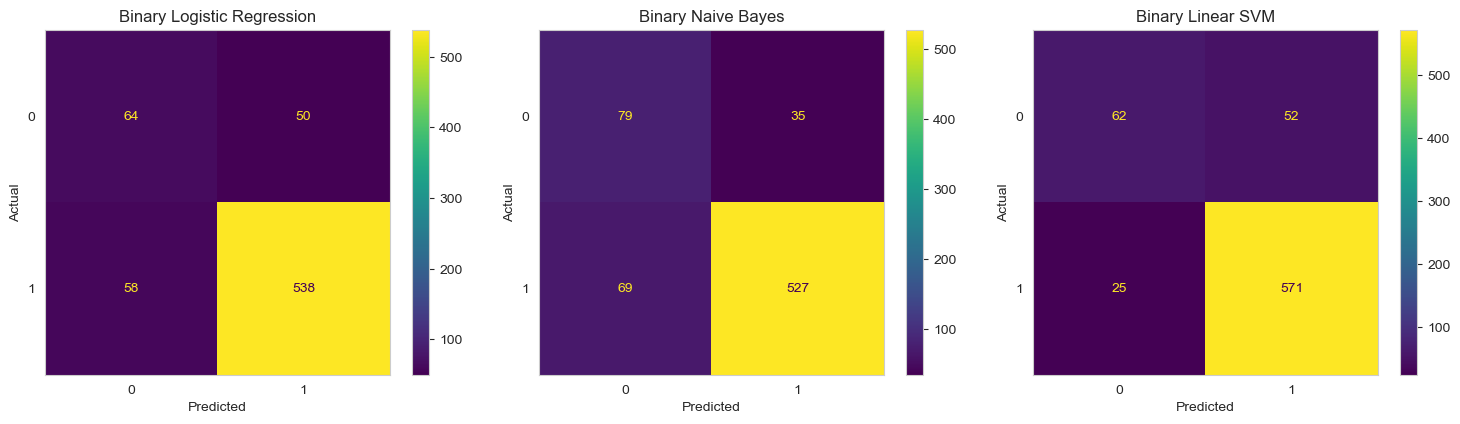

In [43]:
# Model names and their predictions
model_names = ["Binary Logistic Regression", "Binary Naive Bayes", "Binary Linear SVM"]
predictions = [y_pred_log, y_pred_nb, y_pred_svc]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Looping through the models and plot confusion matrices
for i in range(3):
    cm = confusion_matrix(y_test, predictions[i])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot(ax = axes[i])
    axes[i].set_title(model_names[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].grid(False) # to remove the awkward grid lines

plt.tight_layout()
plt.show()

### 5.1.4 Binary Model Performance Comparison 

From the above matrix confusion matrix, we ca conclude that:
1. The linear svm produced the best model out of the three as it was able to predict accurately 89% of the time.
2. The Svm model had a higher false positive (Type 1 error) reading compared to Multinomial Naive Bayes, but a lower false negative(Type 2 error)
3. Logistic regression perfomed the poorest out of the 3 with an accuracy score 84.7 %. Multinomial had an accuracy score of 85.3%.

## 5.2 Multiclass Modelling

In this section, we’ll build models to classify tweets into three sentiment categories:
- Positive emotion (1)
- Negative emotion (0)
- Neutral (2) → merged from “No emotion toward brand or product” and “I can’t tell”.

In [44]:
nlp_df['target'].value_counts()

target
2    5544
1    2978
0     570
Name: count, dtype: int64

In [45]:
# Defining X and y, while vectorizing the tweets 
X_multi = vectorizer.fit_transform(nlp_df['tweets'])
y_multi = nlp_df['target']

# Train test split at 80-20 
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 42, stratify = y_multi)

# Balancing the data by generating new data point
X_multi_train_smote, y_multi_train_smote = smote.fit_resample(X_multi_train, y_multi_train)

# Checking if the balancing has taken place 
y_multi_train_smote.value_counts()

target
1    4435
2    4435
0    4435
Name: count, dtype: int64

### 5.2.1 Training a Multiclass Logistic Regression Model

In [46]:
# Fitting the model
logreg.fit(X_multi_train_smote, y_multi_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

In [47]:
# Predictions
y_pred_multi_log = logreg.predict(X_multi_test)

# Evaluation
print("Multiclass Logistic Regression Performance:\n")
print(classification_report(y_multi_test, y_pred_multi_log))
print("Accuracy:", accuracy_score(y_multi_test, y_pred_multi_log))

Multiclass Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.37      0.49      0.42       114
           1       0.59      0.60      0.60       596
           2       0.77      0.73      0.75      1109

    accuracy                           0.68      1819
   macro avg       0.58      0.61      0.59      1819
weighted avg       0.68      0.68      0.68      1819

Accuracy: 0.6750962067069819


### 5.2.2 Training a Multiclass Multinomial Naive Bayes Model

In [48]:
# Fitting the mnb model
nb.fit(X_multi_train_smote, y_multi_train_smote)

MultinomialNB()

In [49]:
#Predictions 
y_pred_multi_nb = nb.predict(X_multi_test)

#Evaluation 
print("Multiclass Naive Bayes Performance:")
print(classification_report(y_multi_test, y_pred_multi_nb))
print("Accuracy:", accuracy_score(y_multi_test, y_pred_multi_nb))

Multiclass Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.29      0.57      0.38       114
           1       0.53      0.71      0.61       596
           2       0.81      0.58      0.67      1109

    accuracy                           0.62      1819
   macro avg       0.54      0.62      0.55      1819
weighted avg       0.69      0.62      0.63      1819

Accuracy: 0.6206706981858163


### 5.2.3 Training a Support Vector Machine Model

In [50]:
svc.fit(X_multi_train_smote, y_multi_train_smote)

LinearSVC(random_state=42)

In [51]:
# Predictions
y_pred_multi_svc = svc.predict(X_multi_test)

print("Multiclss SVM Performance:\n")
print(classification_report(y_multi_test, y_pred_multi_svc))
print("Accuracy:", accuracy_score(y_multi_test, y_pred_multi_svc))

Multiclss SVM Performance:

              precision    recall  f1-score   support

           0       0.45      0.47      0.46       114
           1       0.60      0.63      0.61       596
           2       0.77      0.75      0.76      1109

    accuracy                           0.69      1819
   macro avg       0.61      0.62      0.61      1819
weighted avg       0.69      0.69      0.69      1819

Accuracy: 0.6915887850467289


#### Confusion Matrix Plots for the 3 Multiclass Models

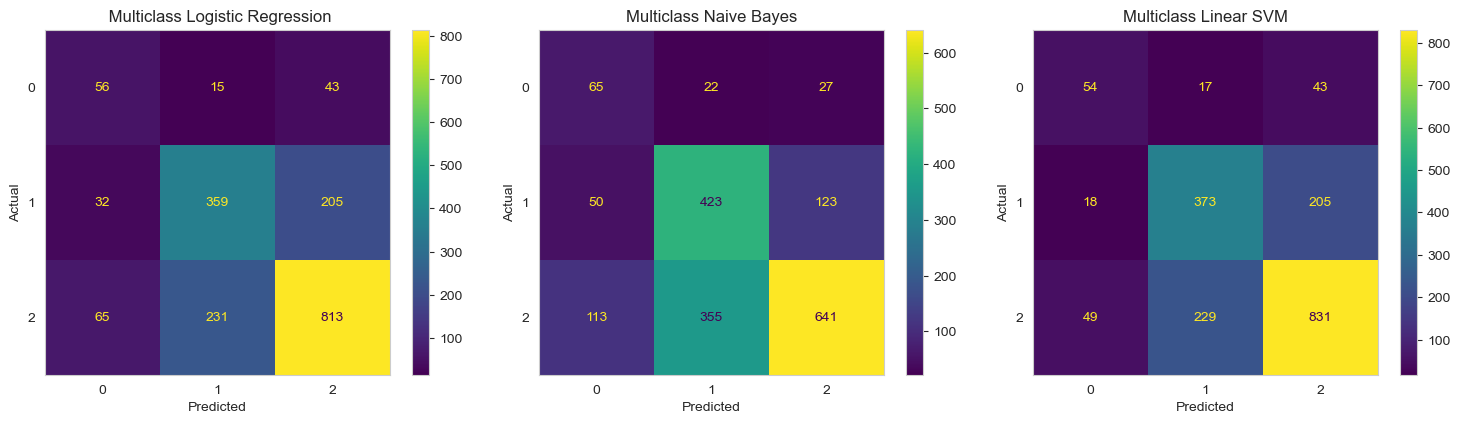

In [52]:
# Model names and their predictions
model_names = [" Multiclass Logistic Regression", "Multiclass Naive Bayes", "Multiclass Linear SVM"]
predictions = [y_pred_multi_log, y_pred_multi_nb, y_pred_multi_svc]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Looping through the models and plot confusion matrices
for i in range(3):
    cm = confusion_matrix(y_multi_test, predictions[i])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot(ax = axes[i])
    axes[i].set_title(model_names[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].grid(False) # to remove the awkward grid lines

plt.tight_layout()
plt.show()

### 5.2.4 Multiclass Model Performance Comparison 

According to the above, we can see that:
1. The SVM model still did well with an acccurcy score of 69.1 % able to predict the targets more accurately.
2. Here, with the inclusion of a third target, the logistic regression model did better with an accuracy score of 67.5 % compare to Multinomial Naive Bayes which had 62% accuracy.
3. SVM model and logistics had high false positives with Multinomial Naive Bayes has high false negatives.

### 5.2.5 Multiclass Hyperparameter Tuning On SVM Model

In [68]:
# Defining the parameters 
svc = LinearSVC(class_weight = 'balanced', random_state = 42)

param = {
    'C': [0.1, 1, 10, 100, 1000]
}

In [69]:
grid = GridSearchCV(svc, 
                          param_grid = param, 
                          scoring = 'accuracy', 
                          cv = 5)

In [70]:
grid.fit(X_multi_train_smote, y_multi_train_smote)

GridSearchCV(cv=5,
             estimator=LinearSVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [71]:
print("Best params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best params: {'C': 10}
Best Accuracy: 0.8523111612175873


In [72]:
# Evaluating on the test model 
y_grid_pred = grid.predict(X_multi_test) 

print("Test Set Accuracy:", accuracy_score(y_multi_test, y_grid_pred))
print(classification_report(y_multi_test, y_grid_pred))

Test Set Accuracy: 0.6827927432655305
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       114
           1       0.58      0.61      0.60       596
           2       0.76      0.75      0.75      1109

    accuracy                           0.68      1819
   macro avg       0.60      0.59      0.59      1819
weighted avg       0.68      0.68      0.68      1819



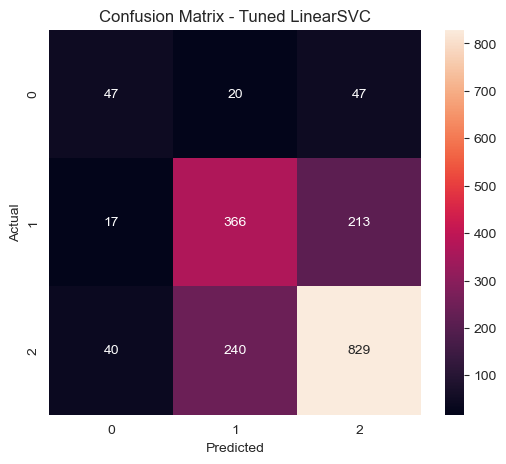

In [77]:
# Visualise the tuned svc confusion matrix
cm = confusion_matrix(y_multi_test, y_grid_pred)

plt.figure(figsize = (6,5))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = [0,1,2], yticklabels = [0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned LinearSVC')
plt.show()

### 5.2.6 Hyperparameter Tuning Performance Review

After tuning our Support Vector Machine model, the training accuracy is 85% with testing accuracy still 69%. Most notable is Class 1 target errors are heavily biased towards being misclassified as Class 2 213 times and Class 2 target errors are heavily biased towards being misclassified as Class 1 240 times.

# **6. Evaluation, Recommendations, and Conclusion**

## 6.1 Overview

* Briefly summarize what was done in the modelling phase:

  * Binary sentiment classification (positive/negative)
  * Multi-class sentiment classification (e.g., negative, neutral, positive)
  * Feature engineering (TF-IDF vectorization)
  * Balancing techniques (SMOTE)
  * Models tested: Logistic Regression, Naive Bayes, LinearSVC
  * Hyperparameter tuning using GridSearchCV

---

## 6.2 Model Evaluation

### 6.2.1 Binary Classification

1. **Model Performance Summary Table**

| Model               | Accuracy | Precision | Recall | F1-score | Notes    |
| ------------------- | -------- | --------- | ------ | -------- | -------- |
| Logistic Regression | 0.xx     | 0.xx      | 0.xx   | 0.xx     | Baseline |
| Naive Bayes         | 0.xx     | 0.xx      | 0.xx   | 0.xx     | Baseline |
| LinearSVC           | 0.xx     | 0.xx      | 0.xx   | 0.xx     | Tuned    |

2. **Confusion Matrix**

* Include diagram(s) for the tuned model.
* Highlight where misclassifications occur (e.g., false positives vs false negatives).

3. **Observations**

* Which model performed best overall?
* How did SMOTE or class weighting affect minority class performance?
* Any notable trends (e.g., certain sentiments are harder to predict)?

---

### 6.2.2 Multi-class Classification

1. **Model Performance Summary Table**

| Model               | Accuracy | Macro F1 | Weighted F1 | Notes    |
| ------------------- | -------- | -------- | ----------- | -------- |
| Logistic Regression | 0.xx     | 0.xx     | 0.xx        | Baseline |
| Naive Bayes         | 0.xx     | 0.xx     | 0.xx        | Baseline |
| LinearSVC           | 0.xx     | 0.xx     | 0.xx        | Tuned    |

2. **Class-wise Performance**

| Class | Logistic Regression F1 | Naive Bayes F1 | LinearSVC F1 |
| ----- | ---------------------- | -------------- | ------------ |
| 0     | 0.xx                   | 0.xx           | 0.xx         |
| 1     | 0.xx                   | 0.xx           | 0.xx         |
| 2     | 0.xx                   | 0.xx           | 0.xx         |

3. **Confusion Matrix / Heatmap**

* Include normalized and non-normalized versions for the tuned LinearSVC.
* Highlight patterns in misclassification (e.g., neutral class often confused with positive).

4. **Observations**

* Which model performed best overall?
* Which classes were hardest to predict?
* Effectiveness of SMOTE and class weighting.
* Comparison with binary classification performance.

---

## 6.3 Error Analysis

* Sample misclassified tweets for **both binary and multi-class models**.
* Discuss possible reasons:

  * Ambiguity in text
  * Short text / slang / emojis
  * Neutral tweets being confused with positive or negative
* Highlight areas for future improvement.

---

## 6.4 Recommendations

1. **For Model Deployment / Business Use**

* LinearSVC is recommended for multi-class tasks.
* Logistic Regression is competitive and interpretable — could be used for simpler applications.
* Naive Bayes may be useful for quick prototyping but underperforms on complex/multi-class data.

2. **Data and Feature Improvements**

* Consider advanced embeddings (Word2Vec, GloVe, BERT) for nuanced text understanding.
* Incorporate n-grams or domain-specific vocabulary.
* Continuously update training data to capture evolving language.

3. **Handling Class Imbalance**

* Continue using SMOTE or try alternative techniques like **ADASYN**, **class-weighting**, or **ensemble methods**.

4. **Hyperparameter Tuning**

* Regularly tune models as new data comes in.
* Use `f1_macro` scoring if class balance is critical.

---

## 6.5 Limitations

* Minority class predictions still challenging.
* TF-IDF + classical ML cannot fully capture semantic meaning.
* External factors (sarcasm, slang, emojis) may reduce model accuracy.

---

## 6.6 Conclusion

* Summarize key takeaways from the modelling phase:

  * Which models performed best and why.
  * Overall accuracy and class-wise performance.
  * How the project achieved its objectives: predicting sentiment reliably across binary and multi-class settings.
* Highlight potential next steps:

  * Improving feature representation (embeddings/transformers)
  * Deploying model into production for real-time sentiment monitoring